# Statistics Using Python

In [26]:
# import packages
import math
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import scipy packages
import scipy.stats
import scipy.optimize
import scipy.spatial

# import statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# import pymc3
# need to type the line below this into the cmd prompt
# set MKL_THREADING_LAYER=GNU
import pymc3

# default style for plt plots to seaborn
sns.set()

## Exploratory Data Analysis (EDA)
- It's best practice to do quick exploration prior to advanced analysis
    - viewing structure
    - checking for NaN's
    - calculating summary stats
    - plotting histograms
    - plotting boxplots to check for outliers, percentiles, and median
        - line is median, box is IQR, whiskers go to 1.5 IQR or range (whichever is greater), dots outliers
    - bee swarm plots to check distribution
        - avoids binning bias from histograms
        - however don't do well with too many data points
    - empirical cumulative distribution function (ECDF)
        - very good plot, do this early to examine the data
        - often include multiple columns (or separate by categories) if it makes sense to do this
        - good function for returning the x, y values for an ECDF
        - x label should be the value your looking at, y label is CDF
        
```python
def ecdf(data):
"""Return x, y data for an ECDF receiving a 1d array, list, or series."""
         
    # compute the number of points
    n = len(data)
            
    # sort the x data and store
    x = np.sort(data)
            
    # compute y using the distribution
    y = np.arange(1, n+1) / n
            
    # return x and y
    return x, y
```

#### Summary Stats
- Good idea to check quick summary stats
    - `np.mean()`
    - `np.median()` (50th percentile)
    - `np.percentile(data, list)`
        - supply a list of the percentiles you want to compute as ints or a single value
        - interquartile range (IQR) is 25%-75%
    - `np.var()` variance
    - `np.std()` stdev
    - `df.column.value_counts()`
        - set `normalize=True` to get percentages

#### Simple Correlation
- Covariance
    - `np.cov(arr1, arr2)`
        - returns a 2d array of covariance (entry `[0,1]` has the data of interest)
        - `co_var = np.cov(arr1, arr2)` then `real_co_var = co_var[0,1]`
    - mean of the product of the x/y distance from the mean
        - ((x - x_mean)(y - y_mean)) / number of observations
        - positive covariance means a positive correlation, negative means negative corr
    - function
    
```python
def co_var(x, y):
    """Compute covariance between two arrays."""
    
    # Compute covariance matrix: cov_mat
    cov_mat = np.cov(x,y) 

    # Return entry [0,1]
    return cov_mat[0,1]
```

- Pearson Correlation Coefficient
    - `np.corrcoef(arr1, arr2)`
        - returns a 2d array (entry `[0,1]` has the data of interest)
        - see covariance above for data extraction
    - Greek letter lowercase rho (kinda like a p)
    - covariance / (np.std(x) * np.std(y))
        - variability due to covariance / independent variability
    - dimensionless (no units)
    - range -1 complete negative corr, to 0 no corr, to 1 complete positive corr
    - closer to -1 or 1, the more tightly packed points are, the better the corr
    - function:
    
```python
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y) 

    # Return entry [0,1]
    return corr_mat[0,1]
```

## Probabilities
#### Basic Info
- Random Numbers
    - `np.random` module
        - `np.random.random([size=])`
            - random number generator (0 < n < 1)
            - `size=` specify the number of random numbers to generate
        - `np.random.seed()`
            - 'seeds' a number for the random number generator 
            - the same seed gives the same sequence for generated random numbers (pseudo-random)
- Simulating Events
    - use for loops to do simulations
    - may need to initialize an empty numpy array
        - `empty_array = np.empty(n)` where n is the number of entries you want
    - Syntax:
        - `for _ in range(n):` to loop/simulate n times
            - can just use `_` because we don't care about using it as a variable
            - update some counter or other such thing in the loop
- Hacker Statistics
    - simulate data to draw inferences to the population vs. actually sampling
    - sort of like resampling
    - **Strategy:**
        - determine how to simulate the data
        - simulate many many times
        - compute probability as the fraction of trials that have the outcome of interest

#### Discrete Outcomes
- Bernoulli Trial
    - T/F binary type trials (heads/tails)
- Probability Mass Function (PMF)
    - set of probabilities of discrete outcomes
        - discrete outcomes like 1-6 when rolling dice
    - generate by simulating something a whole bunch of times
    - **Plotting a PMF**
        - this is the primary shape of the distribution
        - create an array of possible outcomes, and link that to the probability of those outcomes
        - plot hist of possible outcome/number successes on the x and probability of that outcome on the y
- Binomial Distribution
    - Distribution where the outcome of a single event is binary (heads/tails, default/not default)
    - Sampling from the binomial distribution
        - `np.random.binomial(n, p, size=None)`
            - `n` is the number of trials
                - if trying to get the probability of flipping 4 heads/4 attempts, this number is 4
            - `p` is the probability of success (decimal)
                - in coin flip example, this is 0.5 (probability of 1 heads)
            - `size` is the output shape, default is None
                - can supply scalar or an array or nothing at all
                - can also think of size as the number of random samples to take from the binomial distribution
            - output
                - tells you the number of successes achieved from each set of trials
                - in coin flip example, the max output for a single event is 4 (4/4 heads)
                - setting the size=10, will provide an array of 10 events (each consisting of 4 flips)
                    - the value of each item is the number of successes (how many heads were observed)
- Poisson Distribution
    - Poisson process:
        - timing of the next event is completely independent of when the previous event happened
    - poisson distribution -> number of arrivals in a given amount of time and has an average rate of arrival
        - limit of the binomial distribution for low probability of success and a large number of trials (rare events)
    - sampling the poisson distribution
        - `np.random.poisson(lam, size=None)`
            - `lam` is the expectation of interval or average interval
            - size is the number of times to sample
            - output: values drawn from the sample

In [2]:
# use binomial function
# 4 is the number of trials (flip a coin 4 times)
# 4 will be the max of any values (all events true i.e. all heads)
# 0.5 is the probability of a single success (flipping a heads)
# 10 is the number of samples to take (flip 4 coins, 10 times)
np.random.binomial(4, 0.5, 10)

array([1, 3, 4, 2, 3, 3, 2, 3, 2, 1])

In [3]:
# use poisson function
# 6 is the average arrival rate
# 10 is the number of times to sample
np.random.poisson(6, 10)

array([ 8, 11,  3,  2,  5,  8,  4,  5,  3,  4])

In [4]:
# example problem:
# average number of no hitters per year is 251/115 (~ 2.18)
# is 7 no hitters a season anomalous?

# get a large sample from the poisson distribution around the average
n_nohitters = np.random.poisson(251/115, 10000)

# calculate the number of those greater than 7
n_large = np.sum(n_nohitters >= 7)

# calculate probability of getting 7 or more
p_large = n_large/10000

# print the probability of 7 or more
print(p_large)

0.008


Text(0.5, 1.0, 'Probability Distribution\nfor Number of MLB No-Hitters')

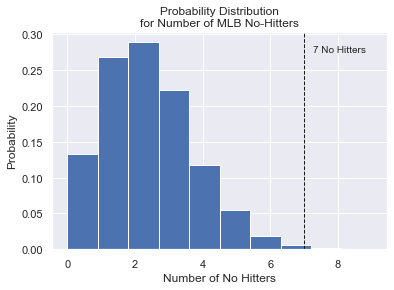

In [12]:
# plot the associated poisson distribution from the question above

plt.hist(n_nohitters, density=True)

# add location of 7 to the plot
plt.axvline(7, color='k', linestyle='dashed', linewidth=1)

# add text to the line
#plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))
plt.text(x=7.25, y=0.275, s='7 No Hitters')

plt.xlabel('Number of No Hitters')
plt.ylabel('Probability')
plt.title('Probability Distribution\nfor Number of MLB No-Hitters')

#### Continuous Variables
- Probability Density Function (PDF)
    - set of probabilities for continuous outcomes
    - the area under the curve is the probability
        - use the cumulative distribution function (CDF) to see exact probabilities
            - y-axis value is the probability that an observation is that value or lower
- Normal Distribution
    - aka 'Gaussian distribution'
    - continuous variable with one peak and symmetric distribution
    - mean determines where the peak is, std determines how wide it is
        - not necessarily the sample mean and std
    - **comparing samples to the normal distribution**
        - could plot hist of observations and a normal curve, not necessarily the best
            - binning bias, by choosing different numbers of bins
        - **better way**
            - calculate theoretical cdf
                - use ecdf function with `samples = np.random.normal(mean, std, size=)`
                    - sample mean and std are ok estimates to use here
                    - `x_theor, y_theor = ecdf(samples)`
            - calculate observed ecdf
                - `x, y = ecdf(data)`
        - compare plots
            - `plt.plot(x_theor, y_theor)` produces a smooth line plot of theoretical values
            - `plt.plot(x, y, marker='.', linestyle='none')` plots scatter of observed values
- Exponential Distribution
    - continuous analog for the geometric distribution (discrete)
    - waiting time of arrivals from a poisson process are exponentially distributed
        - more like an exponential decay with low probabilities of long wait times and high for short
    - sampling this distribution
        - `np.random.exponential(scale, size=None)`
            - scale = beta = 1/lambda (datacamp calls this the 'mean')

## Statistical Inference
- Some different python packages for stat inf
    - scipy.stats
    - statsmodels
    - numpy (hacker stats)
- Optimal Parameters
    - parameters that bring the model in closest agreement with the data
        - like mean, std for sampling from a distrbution (np.random.normal() etc.)
    - if the model is wrong, the optimal parameters are not meaningful
- Linear Regression
    - **least squares**
        - minimize the sum of the squared residuals to find best fit
        - `np.polyfit(x, y, deg)` works with polynomial functions (including 1st degree linear)
            - `x` and `y` are the x/y data
            - `deg` is the degree to fit (1 for linear)
            - output
                - polynomial coefficients, highest power first
                - if y was 2-D, coeff. for k-th dataset are in `p[:,k]`
                - for linear regression, output is `slope, intercept`
    - see `pearson_r` function above for correlation coefficient
    - add a regression line to a plot
        - include your scatter plot `plt.plot(x_data, y_data, marker='.', linestyle='none')`
        - `slope, intercept = np.polyfit(x_data, y_data, 1)`
        - `x = np.array([min, max])` choose min/max x values for your line
        - `y = slope * x + intercept`
        - `plt.plot(x, y)`
    - checking the optimization (just for fun)
        - generate a list of possible slopes (m values for y = mx + b)
            - `m_vals = np.linspace(min, max, samples)`
                - specify the min value for potential slope, max value, and how many values to get (~200 ok)
            - `rss = np.empty_like(m_vals)`
                - initialize empty array the same size/shape as m_vals for **residual sum of squares**
            - `for i, m in enumerate(m_vals): rss[i] = np.sum((y_data - m * x_data - b)**2)`
                - loop through to populate your array, substitute y_data and x_data with actual data
                - b should be calculated using np.polyfit() to find the slope
            - `plt.plot(m_vals, rss, '-')` to view the plot

## Confidence Intervals
- Range of values with chosen percentages that show the probability of getting the true value
    - 95% confidence interval goes from 2.5% quantile to 97.5% quantile
    - Can generate by simulating many times if you know the shape of the distribution

## Bootstrapping
- Useful strategy to generate confidence intervals
    - be careful about using for hypothesis testing, because simulates actual distribution, not null distribution
- Generating a large family of samples from the one you have (sample with replacement)
    - Do not need to make assumptions about the shape of the distribution
    - Represents the 'true' distribution, not the distribution under the null hypothesis 
        - would need to modify the bootstrap values to be appropriate for the null case
            - sometimes straightforward, other times impossible
            - requires problem specific information
        - this means it is not easy to use bootstrapping for hypothesis testing, and need to consider above stuff
- `df.column.sample(n, replace=True)`
    - `n` the number of samples to take
    - `replace=False` by default, set True to sample with replacement
- Use bootstrapping to get a histogram of the population mean using a smaller sample for 'variable' column in 'df'
    ```python
    bootstrap = pd.DataFrame({'variable_mean': [df.sample(100,replace=True).variable.mean() for i in range(1000)]})
    bootstrap.variable_mean.hist(histtype='step')
    # draw original mean as a line on top of the histogram
    plt.axvline(df.variable.mean(),color='C1') 
    ```
- How this works
    - This code creates a series of 1000 different 'means'
    - Each 'mean' is generated by resampling the data 100 times with replacement
- Generate 95% confidence intervals
    ```python
    bootstrap.variable_mean.quantile(0.025), bootstrap.variable_mean.quantile(0.975)
    ```

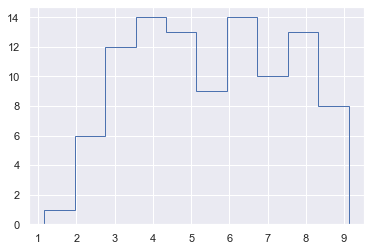

In [21]:
# what are the confidence intervals around a passing grade of 5?

grades = pd.read_csv('grades.csv')

grades.grade.hist(histtype='step')

In [22]:
# what is the percentile for passing?

scipy.stats.percentileofscore(grades.grade,5)

43.0

In [23]:
# create a bootstrap distribution assuming taking grades from 100 people through 1000 simulations

bootstrap = pd.DataFrame({'passing': [scipy.stats.percentileofscore(grades.sample(100,replace=True).grade,5) for i in range(1000)]})

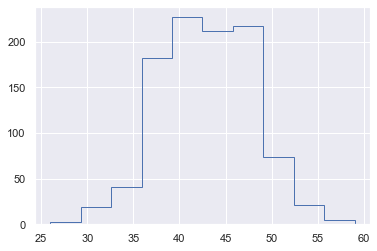

In [24]:
# view the histogram

bootstrap.passing.hist(histtype='step')

In [25]:
# calculate the 95% confidence interval

bootstrap.passing.quantile(0.025), bootstrap.passing.quantile(0.975)

(33.0, 53.0)

## Hypothesis Testing
- Manually
    - get test statistic of interest
    - generate a function to simulate the data
        - could use the `.sample()` method on a dataframe like with bootstrapping above
        - could generate a function to simulate the distribution
            - probability of a certain choice, with each choice having a different probability of occurring (p)
    - simulate this function a large number of times to create a sampling distribution
    - check the quantile of the test statistic (this is the p-value)
```python
def simulate(n):
    """simulate one instance of a distribution by drawning n number of samples"""
    return pd.DataFrame({'column_name': np.random.choice(list_of_choices,size=n,p=list_of_choice_probabilities)})

# n is the number of observations to collect for each instance
# x is the particular sample of interest (one related to the test statistic)
# this will create a sampling distribution, saying if I draw n samples 10000 times, for your x item
# x could be a particular category to see how many counts you get, or a location to compare to other locations
sampling = pd.DataFrame({'counts': [simulate(n).column_name.value_counts()[x] for i in range(10000)]})

# plot the sampling distribution
sampling.counts.hist(histtype='step')

# calculate your percentile based on the observation z
scipy.stats.percentileofscore(sampling.counts,z)

# calculate your p-value
(100 - scipy.stats.percentileofscore(sampling.counts,z)) / 100
```

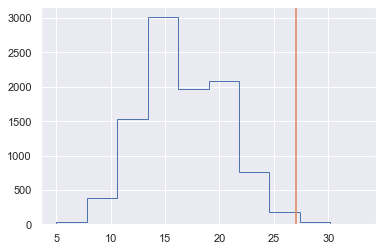

In [18]:
# determine if a dice is rigged, if out of 100 rolls, we get 6 27 times

prob = 1/6

# create function to simulate a roll
def simulate(n):
    return pd.DataFrame({'roll': np.random.choice([1,2,3,4,5,6],size=n,p=[prob,prob,prob,prob,prob,prob])})

# supply 100 for n, since we are checking the probability of 27 6's in 100 rolls
# supply 6 to slice, since we are checking for the value of '6' on the dice
sampling = pd.DataFrame({'counts': [simulate(100).roll.value_counts()[6] for i in range(10000)]})

# plot the hist
sampling.counts.hist(histtype='step')

# overlay the observed value for 6, which was 27
plt.axvline(27,c='C1')

In [14]:
# use the sampling distribution we just created to see where 27 falls
scipy.stats.percentileofscore(sampling.counts,27)

99.6

In [16]:
# caluclate p value
(100 - scipy.stats.percentileofscore(sampling.counts,27)) / 100

0.0040000000000000565

## Additional Functions to Create Sampling Distributions
```python

# create a function to simulate a distribution between two outcomes, where each is as likely (50%)
# examples: coin flip, votes for two candidates, etc.
def sample(outcome1, n=1000):
    return pd.DataFrame({'col_name': np.where(np.random.rand(n) < outcome1,'outcome1','outcome2')})

# create the distribution of 'outcome1' values obtained from 10000 trials of drawing 1000 samples at 0.50 probability
dist = pd.DataFrame({'outcome1': [sample(0.50,1000).col_name.value_counts(normalize=True)['outcome1'] for i in range(10000)]})

# plot the histogram
dist.outcome1.hist(histtype='step')

# calculate the percentile for the observed value (z) of outcome1 (divide by 100 to get p value)
100 - scipy.stats.percentileofscore(dist.outcome1,z)
```

## Statistical Modeling
- Goal
    - use variation in one or more explanatory variables to describe variation in one or more response variables
- Strategy
    - produce a model that generates response values from input explanatory values
    - minimize the residuals (difference between actual and theoretical values from the model)
- Uses
    - model parameters may reveal insights
    - predict future behavior
- statsmodels ordinary least squares
    - `ols` ordinary least squares - minimize the sum of the squared residuals

#### statsmodels
- Import package
    - `import statsmodels`
    - `import statsmodels.api as sm`
    - `import statsmodels.formula.api as smf`
- linear model example
    - `model = smf.ols(formula='response_var ~ model_terms', data=df)`
        - where `response_var` is your y var column 
        - `df` is your dataframe
        - `model_terms` can be a column name (explanatory_var as a vector) or scalar value (int/float)
            - if supplying int/float as model_terms, keep value inside the ''
        - can include multiple `model_terms` by using a + sign
            - `'response_var ~ explanatory_var1 + explanatory_var2'`
        - not sure why, but one example uses `-1` as the first model term
            - documentation says this removes 'the intercept'
        - can make an interaction by supplying a colon between two model terms
            - term1:term2 (uses the interaction of the two as a term)
    - `grandmean = model.fit()`
        - grandmean is the mean of all response variables
        - will produce multiple values if using multiple model terms
    - create a function to check the fit
        ```python
        # second line of the function formats the scatter points, need array of colors
        def plotfit(fit):
            plotdata()
            plt.scatter(df.x_var,fit.predict(df),
                       c=colors, s=30, linewidths=0.5, edgecolor='k', marker='D')
        ```
    - use function to plot grandmean
        - `plotfit(grandmean)`
    - view grandmeans
        - `grandmean.params`
        - same value(s) as df.response_var.mean() for each response variable

In [27]:
# statsmodels example using gapminder data

gapminder = pd.read_csv('gapminder.csv')

# filter to 1985
gdata = gapminder.query('year == 1985')

In [28]:
# set plotting function and params

# set size of markers for scaling population size
size = 1e-6 * gdata.population

# set dictionary of colors
colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

# define a plotting function to plot the number of babies vs. the survival rate of babies
def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

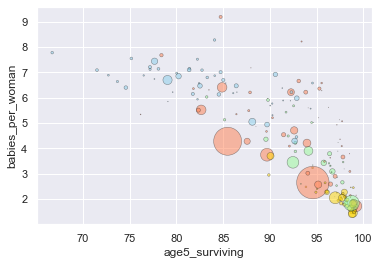

In [29]:
plotdata()

In [30]:
# calculate a grandmean 

# generate a model
# not exactly sure what the 1 is doing here
model = smf.ols(formula='babies_per_woman ~ 1',data=gdata)

# use .fit() on the model to produce linear regression results object
grandmean = model.fit()

In [31]:
# define a function to plot the data using the 'fit' results object you supply

def plotfit(fit):
    plotdata()
    plt.scatter(gdata.age5_surviving,fit.predict(gdata),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

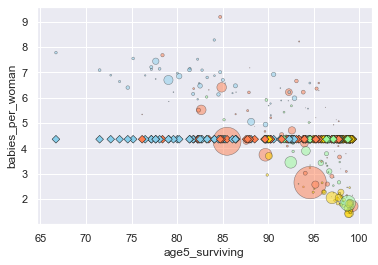

In [32]:
plotfit(grandmean)

In [33]:
# view the results of the fit
grandmean.params

Intercept    4.360714
dtype: float64

In [34]:
# compare this result to the mean from the data
gdata.babies_per_woman.mean()

4.360714285714285

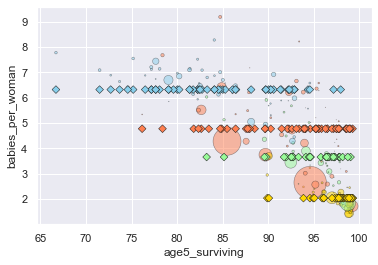

In [35]:
# add an explanatory variable, region, to the model

groupmeans = smf.ols(formula='babies_per_woman ~ 1 + region',data=gdata).fit()
plotfit(groupmeans)

In [36]:
# view the values, which are scaled based on the intercept

groupmeans.params

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

In [37]:
# remove the intercept to view the actual means (this is the -1)

groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region',data=gdata).fit()
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [38]:
# compare to the means for each region

gdata.groupby('region').babies_per_woman.mean()

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

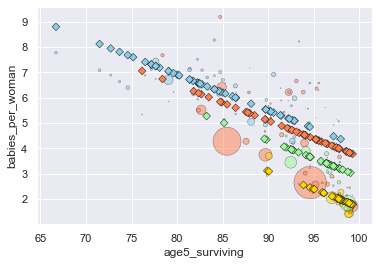

In [39]:
# add another explanatory variable

surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving',data=gdata).fit()
plotfit(surviving)

In [40]:
# view the values based on the new model
# the number of babies per woman decreases by 0.14 babies for each baby that survives to age 5

surviving.params

region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

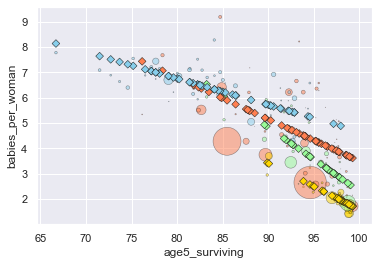

In [41]:
# check for an interaction between region and survival (can produce different slopes for different regions)

surviving_byregion = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region',data=gdata).fit()
plotfit(surviving_byregion)

In [42]:
# view the results of the model
# each region has a different slope

surviving_byregion.params

region[Africa]                    15.080914
region[America]                   27.506243
region[Asia]                      20.032483
region[Europe]                    19.884446
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

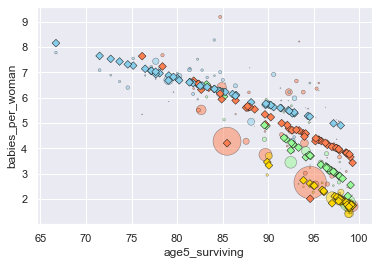

In [43]:
# India/China (the large circles) appear to be outliers, check if population is a factor

surviving_byregion_population = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region + population',data=gdata).fit()
plotfit(surviving_byregion_population)

In [44]:
# check the values, population also has a negative slope
# that means fewer babies per women as some survive, especially when pop is large

surviving_byregion_population.params

region[Africa]                    1.513953e+01
region[America]                   2.721512e+01
region[Asia]                      2.060924e+01
region[Europe]                    1.997501e+01
age5_surviving:region[Africa]    -1.044609e-01
age5_surviving:region[America]   -2.484114e-01
age5_surviving:region[Asia]      -1.702392e-01
age5_surviving:region[Europe]    -1.835316e-01
population                       -2.367914e-09
dtype: float64

## Goodness of Fit
- Classical Measures
    - mean square residuals
        - mean of all of the squared residuals
    - r^2
        - explained variance/total variance
    - f-stats
        - explanatory power of 'fit' parameters vs. random fit vectors
        - tells you if it's worth including more explanatory variables or not
        - f=1 means the variable contributes the same as random vector (basically not at all)
        - large f means the variables explains much more than that
    - ANOVA
        - analysis of variance
        - how much variation is being explained by each added variable
- Plot scatter plot of residuals vs. your primary x var in the model to check for goodness of fit among models
    - `plt.scatter(df.x_var,results_object.resid)`
- Get mean square residuals in single number
    - `.mse_resid` attribute of a results object
- Get r-squared values
    - `.rsquared` attribute
- Get f-statistic
    - `.fvalue` attribute
- View the summary of a model
    - `.summary()` method
- View the ANOVA results
    - `sm.stats.anova_lm(results_object)`
    - degress of freedom, sum of squares, MSS, f-statistic, p-value
    - p-value is vs. a model with the same number of parameters that are random

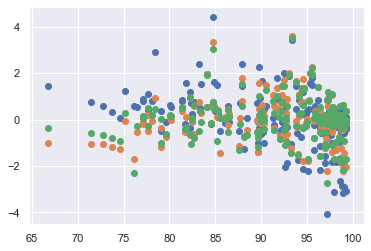

In [45]:
# example using surviving and surviving_byregion_population models produced above

# plot residuals of three of the models
# tighter grouping means better fit
# these results suggest the best fit model isn't much better than the worst
plt.scatter(gdata.age5_surviving,groupmeans.resid)
plt.scatter(gdata.age5_surviving,surviving.resid)
plt.scatter(gdata.age5_surviving,surviving_byregion_population.resid)

In [46]:
# print mean squared residuals (mean squared error) for each model

for model in [groupmeans,surviving,surviving_byregion_population]:
    print(model.mse_resid)

1.4979520263709154
0.9423025333008324
0.8480227300570319


In [47]:
# print r-squared values for each model

for model in [groupmeans,surviving,surviving_byregion_population]:
    print(model.rsquared)

0.636467696559659
0.7726009080146058
0.7999775707885217


In [48]:
# get the f-statistic
# results suggest that the surviving model does the best

for model in [groupmeans,surviving,surviving_byregion_population]:
    print(model.fvalue)

103.88003937611687
150.34180603430977
86.4878755672519


In [50]:
# view the summary of surviving model

surviving.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           8.26e-56
Time:                        15:38:53   Log-Likelihood:                -250.30
No. Observations:                 182   AIC:                             510.6
Df Residuals:                     177   BIC:                             526.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
region[Africa]     18.2658      1.168     15.639      0.000      15.961      20.571
region[America]    17.0859      1.315     12.990      0.000      14.490      19.682
region[Asia]       17.8647      1.279     13.971      0.000      15.341      20.388
region[Europe]     15.8722      1.352     11.739      0.000      13.204      18.541
age5_surviving     -0.1419      0.014    -10.294      0.000      -0.169      -0.115
==============================================================================
Omnibus:                       13.021   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.362
Skew:                           0.443   Prob(JB):                     0.000103
Kurtosis:                       4.279   Cond. No.                     3.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# look at ANOVA tables

sm.stats.anova_lm(groupmeans)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,655.512121,2.604302e-105
Residual,178.0,266.635461,1.497952,NaN,NaN


In [52]:
sm.stats.anova_lm(surviving)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1042.049316,8.236854e-122
age5_surviving,1.0,99.847912,99.847912,105.961630,9.003514e-20
Residual,177.0,166.787548,0.942303,NaN,NaN


In [53]:
sm.stats.anova_lm(surviving_byregion_population)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1157.900225,1.132132e-123
age5_surviving:region,4.0,110.113541,27.528385,32.461848,3.514845e-20
population,1.0,9.813987,9.813987,11.572788,8.313090e-04
Residual,173.0,146.707932,0.848023,NaN,NaN


In [54]:
# the lower f-stats for the more complicated model is because each variable is explaining less